# This python notebook shows how to converte PDF files to PNG and use SURF

## To do so, 1) install the following requiriments:

### In your linux distribution:
    libmagickwand-dev ghostscript 

### In your pip distribution:
    wand==0.4.4
    ghostscript==0.4.1
    opencv3==3.2.0
    
# Case you are using the Dockerfile it is already there! 
# Upload your image and Enjoy!!!

In [5]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import urllib
import glob

In [2]:
#Let's load and save some pdf files
url = 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645173.pdf'
file_name='5645173.pdf'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read() # a `bytes` object
    out_file.write(data)

In [3]:
#Let's load and save some pdf files
url = 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645177.pdf'
file_name='5645177.pdf'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read() # a `bytes` object
    out_file.write(data)

In [4]:
print (glob.glob('5645173.pdf'))
print (glob.glob('5645177.pdf'))

['5645173.pdf']
['5645177.pdf']


# Now let's convert the downloaded pdf to images

In [8]:
from __future__ import print_function
from wand.image import Image

with Image(filename='5645173.pdf', resolution=300) as img:
    img.compression_quality = 99
    print('width =', img.width)
    print('height =', img.height)
    print('pages = ', len(img.sequence))
    print('resolution = ', img.resolution)

    with img.convert('png') as converted:
        converted.save(filename='5645173.png')
file_name1='5645173.png'

width = 2479
height = 3508
pages =  1
resolution =  (300, 300)


In [9]:
from __future__ import print_function
from wand.image import Image

with Image(filename='5645177.pdf', resolution=300) as img:
    img.compression_quality = 99
    print('width =', img.width)
    print('height =', img.height)
    print('pages = ', len(img.sequence))
    print('resolution = ', img.resolution)

    with img.convert('png') as converted:
        converted.save(filename='5645177.png')
file_name2='5645177.png'

width = 2479
height = 3508
pages =  1
resolution =  (300, 300)


## Great they were converted!

# Let's use SURF to extract features from these images!

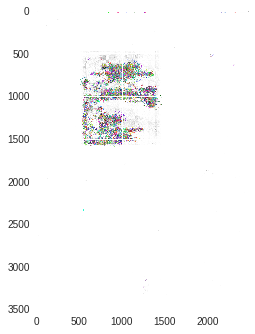

(<matplotlib.image.AxesImage at 0x7f98b515e828>, None)

In [7]:
import cv2
import numpy as np
from cv2 import xfeatures2d

img = cv2.imread(file_name1)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = xfeatures2d.SURF_create(400)

kp, des = surf.detectAndCompute(img,None)
img=cv2.drawKeypoints(gray, kp, img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('surf_keypoints.jpg',img)
plt.imshow(img,),plt.show()        

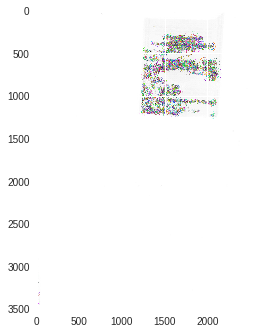

(<matplotlib.image.AxesImage at 0x7fcf74bfd320>, None)

In [6]:
import cv2
import numpy as np
from cv2 import xfeatures2d


img = cv2.imread(file_name2, 1)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = xfeatures2d.SURF_create(400)

kp, des = surf.detectAndCompute(img,None)
img=cv2.drawKeypoints(gray, kp, img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('surf_keypoints2.jpg',img)

plt.imshow(img,),plt.show()

# SURF done! Go to our directory and check the generated files

## Let's play with 2 images and see whether we can match common keypoints between them

## I took the next algorithm from here:
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html


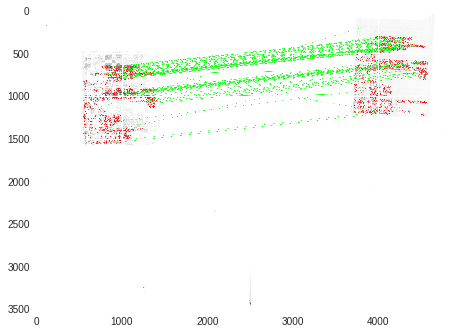

(<matplotlib.image.AxesImage at 0x7fcf535c6cf8>, None)

In [10]:
img1 = cv2.imread(file_name1,0)          # queryImage
img2 = cv2.imread(file_name2,0) # trainImage

# Initiate SIFT detector
surf = xfeatures2d.SURF_create(400)

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
cv2.imwrite('macht_keypoints.jpg',img3)
plt.imshow(img3,),plt.show()        

## Great it works! We can work with these parsed images :D